In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
from folium.plugins import HeatMap 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans    ##  K-means 임포트
from sklearn.metrics import silhouette_score
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
# import setuptools.dist
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## 1. top100_kdrama.csv 파일 읽어오기

In [3]:
drama = pd.read_csv('../../data/top100_kdrama.csv')
drama.head(2)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1


## 2. 데이터 기본 정보 확인

In [4]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


## 3. 기초 통계량 확인

In [5]:
drama.describe()

,Year of release,Number of Episode,Rating
count,100.000000,100.000000,100.000000
mean,2017.970000,19.070000,8.723000
std,2.869044,12.378096,0.174573
min,2003.000000,6.000000,8.500000
25%,2017.000000,16.000000,8.600000
50%,2019.000000,16.000000,8.700000
75%,2020.000000,20.000000,8.800000
max,2021.000000,100.000000,9.200000


## 4. 데이터 정렬 _ 드라마 방영년도(Year of release) 기준으로 오름차순 정렬

In [6]:
d1 = drama.sort_values(by='Year of release', ascending=True)
d1.head(3)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
64,Jewel in the Palace,2003,"Sep 15, 2003 - Mar 23, 2004","Monday, Tuesday",54,MBC,1 hr. 5 min.,13+ - Teens 13 or older,About 500 years ago during the time of Chosun ...,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...","Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",#65,8.6
62,The Bridal Mask,2012,"May 30, 2012 - Sep 6, 2012","Wednesday, Thursday",28,KBS2,1 hr. 5 min.,15+ - Teens 15 or older,Lee Kang To is an ambitious and callous Korean...,"Joo Won, Jin Se Yeon, Park Ki Woong, Han Chae ...","Action, Historical, Romance, Political","Japanese Colonial Rule, Hidden Identity, Reven...",#63,8.6
88,Reply 1997,2012,"Jul 24, 2012 - Sep 18, 2012",Tuesday,16,tvN,60 min.,15+ - Teens 15 or older,"Set in the 1990's, the drama centers around a ...","Jung Eun Ji, Seo In Guk, Hoya, Shin So Yool, E...","Comedy, Romance, Life, Family","Childhood Friends, High School, 1990s, Strong ...",#89,8.5


## 5. 데이터 정렬 _ 에피소드 개수 (Number of Episode) 기준으로 내림차순 정렬

In [7]:
d2 = drama.sort_values(by='Number of Episode', ascending=False)
d2.head(3)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
81,Once Again,2020,"Mar 28, 2020 - Sep 13, 2020","Saturday, Sunday",100,KBS2,35 min.,15+ - Teens 15 or older,"""Once Again"" is the story of the eventful Song...","Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Comedy, Romance, Drama, Family","Divorce, Family Relationship, Multiple Couples...",#82,8.6
64,Jewel in the Palace,2003,"Sep 15, 2003 - Mar 23, 2004","Monday, Tuesday",54,MBC,1 hr. 5 min.,13+ - Teens 13 or older,About 500 years ago during the time of Chosun ...,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...","Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",#65,8.6
65,My Father is Strange,2017,"Mar 4, 2017 - Aug 27, 2017","Saturday, Sunday",52,KBS2,1 hr. 6 min.,15+ - Teens 15 or older,This drama is about a family that lives on the...,"Kim Yeong Cheol, Kim Hae Sook, Ryu Soo Young, ...","Comedy, Romance, Drama, Family","Family Secret, Sisterhood, Eccentric Female Le...",#66,8.6


## 6. 데이터 빈도수 확인 _ 'Year of release'항목 기준

In [8]:
drama.groupby('Year of release').count()[['Name']]  ## 결측값이 있으면 그 행은 제외

,Name
Year of release,
2003,1
2012,2
2013,5
2014,4
2015,3
2016,8
2017,16
2018,10
2019,15


In [9]:
drama.groupby('Year of release').size() ## 결측값과는 무관하게 행의 갯수

Year of release
2003     1
2012     2
2013     5
2014     4
2015     3
2016     8
2017    16
2018    10
2019    15
2020    17
2021    19
dtype: int64

In [10]:
drama['Year of release'].value_counts()     ## 특정 컬럼 값 빈도수(결측값 제외), 내림차순

Year of release
2021    19
2020    17
2017    16
2019    15
2018    10
2016     8
2013     5
2014     4
2015     3
2012     2
2003     1
Name: count, dtype: int64

In [11]:
drama.value_counts('Year of release')   ## 옛날 버전에서 사용하던 형식(권장 않함)

Year of release
2021    19
2020    17
2017    16
2019    15
2018    10
2016     8
2013     5
2014     4
2015     3
2012     2
2003     1
Name: count, dtype: int64

## 7. 평점별 드라마 개수 확인 _ 'Rating'

In [12]:
drama.groupby('Rating').size()

Rating
8.5    15
8.6    25
8.7    24
8.8    16
8.9     5
9.0     9
9.1     5
9.2     1
dtype: int64

In [13]:
drama.groupby('Rating').agg({'Name':'count'}).reset_index()

,Rating,Name
0,8.5,15
1,8.6,25
2,8.7,24
3,8.8,16
4,8.9,5
5,9.0,9
6,9.1,5
7,9.2,1


## 8. 'Network' 항목의 방송 채널별 개수

In [14]:
drama.groupby('Network').agg({'Name': 'count'}).sort_values(by='Network', ascending=False).reset_index()

,Network,Name
0,tvN,19
1,"jTBC, Viki",1
2,"jTBC, Netflix",2
3,jTBC,8
4,SBS,17
5,OCN,7
6,"Netflix, tvN",16
7,"Netflix, SBS",2
8,"Netflix, OCN",1
9,Netflix,7


## 9. 데이터 선택 _ 드라마 이름(Name)과 평점(Rating)을 출력

In [15]:
drama[['Name', 'Rating']]

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


In [16]:
drama.loc[:, ['Name', 'Rating']]

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


In [17]:
drama.iloc[:, [0,13]]

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


In [18]:
drama.iloc[:, [0, -1]]

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


## 10. 에피소드 개수('Number of Episode')가 가장 많은 드라마 정보

In [19]:
drama.loc[drama['Number of Episode']==drama['Number of Episode'].max()]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
81,Once Again,2020,"Mar 28, 2020 - Sep 13, 2020","Saturday, Sunday",100,KBS2,35 min.,15+ - Teens 15 or older,"""Once Again"" is the story of the eventful Song...","Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Comedy, Romance, Drama, Family","Divorce, Family Relationship, Multiple Couples...",#82,8.6


In [20]:
## 에피소드 개수('Number of Episode')가 가장 적은 드라마 정보
drama.loc[drama['Number of Episode']==drama['Number of Episode'].min()]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
16,Kingdom,2020,"Mar 13, 2020",Friday,6,Netflix,45 min.,18+ Restricted (violence & profanity),"Following the events in season one, waves of t...","Joo Ji Hoon, Bae Doo Na, Kim Sung Gyu, Ryu Seu...","Thriller, Historical, Horror, Supernatural","Zombies, Corruption, Strong Male Lead, Gore, S...",#17,8.9
23,D.P.,2021,"Aug 27, 2021",Friday,6,Netflix,50 min.,15+ - Teens 15 or older,Private soldier Jun Ho is a confused youth who...,"Jung Hae In, Koo Kyo Hwan, Kim Sung Kyun, Son ...","Action, Military, Comedy, Drama","Abuse, Soldier, Military Abuse, Violence, PTSD...",#24,8.8
24,Kingdom,2019,"Jan 25, 2019",Friday,6,Netflix,51 min.,18+ Restricted (violence & profanity),No sooner does the Joseon King succumb to smal...,"Joo Ji Hoon, Ryu Seung Ryong, Bae Doo Na, Kim ...","Thriller, Historical, Horror, Political","Joseon Dynasty, Adapted From A Webtoon, Power ...",#25,8.8
45,Arthdal Chronicles Part 2,2019,"Jun 22, 2019 - Jul 7, 2019","Saturday, Sunday",6,"Netflix, tvN",1 hr. 21 min.,15+ - Teens 15 or older,Ta Gon has now become the most powerful man in...,"Song Joong Ki, Kim Ji Won, Jang Dong Gun, Kim ...","Historical, Romance, Fantasy, Political","Twins, War, Power Struggle, Revenge, Slavery, ...",#46,8.7
47,Arthdal Chronicles Part 3,2019,"Sep 7, 2019 - Sep 22, 2019","Saturday, Sunday",6,"Netflix, tvN",1 hr. 20 min.,15+ - Teens 15 or older,"Following Part I & II, Ta Gon has gotten what ...","Song Joong Ki, Kim Ji Won, Jang Dong Gun, Kim ...","Historical, Romance, Fantasy, Political","Power Struggle, War, Supernatural Power, Stron...",#48,8.7
92,Arthdal Chronicles Part 1,2019,"Jun 1, 2019 - Jun 16, 2019","Saturday, Sunday",6,"Netflix, tvN",1 hr. 20 min.,15+ - Teens 15 or older,Set in the fictional land of Arthdal during an...,"Song Joong Ki, Kim Ji Won, Jang Dong Gun, Kim ...","Historical, Romance, Fantasy, Political","Power Struggle, Multiple Mains, Curse, Hidden ...",#93,8.5


## 11. 에피소드 개수가 가장 적은 드라마 '이름'(Name) 출력

In [21]:

drama.loc[drama['Number of Episode']==drama['Number of Episode'].min(), ['Name']]

,Name
16,Kingdom
23,D.P.
24,Kingdom
45,Arthdal Chronicles Part 2
47,Arthdal Chronicles Part 3
92,Arthdal Chronicles Part 1


In [22]:
drama.loc[drama['Number of Episode']==drama['Number of Episode'].min(), ['Name', 'Number of Episode']]

,Name,Number of Episode
16,Kingdom,6
23,D.P.,6
24,Kingdom,6
45,Arthdal Chronicles Part 2,6
47,Arthdal Chronicles Part 3,6
92,Arthdal Chronicles Part 1,6


## 12. 넷플릭스 방영드라마 검색

In [23]:
drama.loc[drama['Network'].str.contains('Netflix', case=False)]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0
11,Navillera,2021,"Mar 22, 2021 - Apr 27, 2021","Monday, Tuesday",12,"Netflix, tvN",1 hr. 5 min.,15+ - Teens 15 or older,A 70-year-old with a dream and a 23-year-old w...,"Park In Hwan, Song Kang, Na Moon Hee, Hong Seu...","Friendship, Life, Drama, Family","Ballet, Dream, Life Lesson, Old-Young Generati...",#12,9.0
13,Vincenzo,2021,"Feb 20, 2021 - May 2, 2021","Saturday, Sunday",20,"Netflix, tvN",1 hr. 25 min.,15+ - Teens 15 or older,"At the age of eight, Park Joo Hyeong went to I...","Song Joong Ki, Jeon Yeo Been, Ok Taec Yeon, Ki...","Comedy, Law, Crime, Drama","Mafia, Revenge, Smart Male Lead, Eccentric Fem...",#14,9.0
14,Crash Landing on You,2019,"Dec 14, 2019 - Feb 16, 2020","Sunday, Saturday",16,"Netflix, tvN",1 hr. 25 min.,15+ - Teens 15 or older,"After getting into a paragliding accident, Sou...","Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hyu...","Military, Comedy, Romance, Political","North And South Korea, Star Crossed Lovers, Lo...",#15,9.0
16,Kingdom,2020,"Mar 13, 2020",Friday,6,Netflix,45 min.,18+ Restricted (violence & profanity),"Following the events in season one, waves of t...","Joo Ji Hoon, Bae Doo Na, Kim Sung Gyu, Ryu Seu...","Thriller, Historical, Horror, Supernatural","Zombies, Corruption, Strong Male Lead, Gore, S...",#17,8.9
17,Mr. Sunshine,2018,"Jul 7, 2018 - Sep 30, 2018","Saturday, Sunday",24,"Netflix, tvN",1 hr. 20 min.,15+ - Teens 15 or older,Mr. Sunshine centers on a young boy born into ...,"Lee Byung Hun, Kim Tae Ri, Kim Min Jung, Yoo Y...","Military, Historical, Romance, Melodrama","Independent Female Lead, Strong Male Lead, Str...",#18,8.9


## 13. 넷플릭스와 tvN, 둘 다 방영된 드라마 검색

In [24]:
d2 = drama['Network'].str.contains('Netflix', case=False) & drama['Network'].str.contains('TvN', case=False)
drama.loc[d2]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0
11,Navillera,2021,"Mar 22, 2021 - Apr 27, 2021","Monday, Tuesday",12,"Netflix, tvN",1 hr. 5 min.,15+ - Teens 15 or older,A 70-year-old with a dream and a 23-year-old w...,"Park In Hwan, Song Kang, Na Moon Hee, Hong Seu...","Friendship, Life, Drama, Family","Ballet, Dream, Life Lesson, Old-Young Generati...",#12,9.0
13,Vincenzo,2021,"Feb 20, 2021 - May 2, 2021","Saturday, Sunday",20,"Netflix, tvN",1 hr. 25 min.,15+ - Teens 15 or older,"At the age of eight, Park Joo Hyeong went to I...","Song Joong Ki, Jeon Yeo Been, Ok Taec Yeon, Ki...","Comedy, Law, Crime, Drama","Mafia, Revenge, Smart Male Lead, Eccentric Fem...",#14,9.0
14,Crash Landing on You,2019,"Dec 14, 2019 - Feb 16, 2020","Sunday, Saturday",16,"Netflix, tvN",1 hr. 25 min.,15+ - Teens 15 or older,"After getting into a paragliding accident, Sou...","Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hyu...","Military, Comedy, Romance, Political","North And South Korea, Star Crossed Lovers, Lo...",#15,9.0
17,Mr. Sunshine,2018,"Jul 7, 2018 - Sep 30, 2018","Saturday, Sunday",24,"Netflix, tvN",1 hr. 20 min.,15+ - Teens 15 or older,Mr. Sunshine centers on a young boy born into ...,"Lee Byung Hun, Kim Tae Ri, Kim Min Jung, Yoo Y...","Military, Historical, Romance, Melodrama","Independent Female Lead, Strong Male Lead, Str...",#18,8.9
19,Stranger,2017,"Jun 10, 2017 - Jul 30, 2017","Saturday, Sunday",16,"Netflix, tvN",1 hr. 10 min.,15+ - Teens 15 or older,Hwang Shi Mok underwent brain surgery as a chi...,"Jo Seung Woo, Bae Doo Na, Lee Joon Hyuk, Yoo J...","Thriller, Mystery, Law, Drama","Suspense, Investigation, Corruption, Crime Sol...",#20,8.9
21,Hometown Cha-Cha-Cha,2021,"Aug 28, 2021 - Oct 17, 2021","Saturday, Sunday",16,"Netflix, tvN",1 hr. 20 min.,15+ - Teens 15 or older,Hometown Cha-Cha-Cha is a love story set in th...,"Shin Min Ah, Kim Seon Ho, Lee Sang Yi, In Gyo ...","Comedy, Romance, Life","Rural Village, Dentist, Healing, Kind-hearted ...",#22,8.8


In [25]:
d3 = drama['Network'].str.contains('Netflix', case=False) | drama['Network'].str.contains('TvN', case=False)
drama[d3]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
6,Reply 1988,2015,"Nov 6, 2015 - Jan 16, 2016","Friday, Saturday",20,tvN,1 hr. 40 min.,15+ - Teens 15 or older,"Five childhood friends, who all live in the sa...","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...",#7,9.0
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0
8,Mr. Queen,2020,"Dec 12, 2020 - Feb 14, 2021","Saturday, Sunday",20,tvN,1 hr. 20 min.,15+ - Teens 15 or older,Jang Bong Hwan is a South Korean chef who has ...,"Shin Hye Sun, Kim Jung Hyun, Bae Jong Ok, Kim ...","Historical, Mystery, Comedy, Romance","Smart Male Lead, Transmigration, Calm Male Lea...",#9,9.0
9,Mother,2018,"Jan 24, 2018 - Mar 15, 2018","Wednesday, Thursday",16,tvN,1 hr. 3 min.,15+ - Teens 15 or older,"Realizing one of her students is being abused,...","Lee Bo Young, Heo Yool, Lee Hye Young, Go Sung...","Thriller, Mystery, Psychological, Melodrama","Mother-Daughter Relationship, Independent Fema...",#10,9.0


## 15. 2015년에서 2020년 사이에 방영된 드라마 검색

In [26]:
d4 = (drama['Year of release']>=2015) & (drama['Year of release']<=2020)
drama.loc[d4]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
6,Reply 1988,2015,"Nov 6, 2015 - Jan 16, 2016","Friday, Saturday",20,tvN,1 hr. 40 min.,15+ - Teens 15 or older,"Five childhood friends, who all live in the sa...","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...",#7,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vagabond,2019,"Sep 20, 2019 - Nov 23, 2019","Friday, Saturday",16,"Netflix, SBS",1 hr. 10 min.,15+ - Teens 15 or older,Cha Dal Gun becomes an awakened tiger in the f...,"Lee Seung Gi, Bae Suzy, Shin Sung Rok, Baek Y...","Action, Thriller, Mystery, Crime","Plane Crash, Revenge, National Intelligence Se...",#96,8.5
96,Doctor John,2019,"Jul 19, 2019 - Sep 7, 2019","Friday, Saturday",32,SBS,35 min.,15+ - Teens 15 or older,“Doctor John” is a medical drama about doctors...,"Ji Sung, Lee Se Young, Lee Kyu Hyung, Hwang He...","Mystery, Romance, Life, Medical","Smart Male Lead, Incurable Disease, Eccentric ...",#97,8.5
97,When the Camellia Blooms,2019,"Sep 18, 2019 - Nov 21, 2019","Wednesday, Thursday",40,"KBS2, Netflix",35 min.,15+ - Teens 15 or older,Dong Baek is a single mother living in the sma...,"Gong Hyo Jin, Kang Ha Neul, Kim Ji Suk, Son Da...","Thriller, Comedy, Romance, Drama, Family","Single Mother, Mystery, Motherhood, Serial Kil...",#98,8.5
98,Because This Is My First Life,2017,"Oct 9, 2017 - Nov 28, 2017","Monday, Tuesday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,A house-poor man and homeless woman become hou...,"Jung So Min, Lee Min Ki, Esom, Park Byung Eun,...","Comedy, Romance, Life, Drama","Contract Relationship, Marriage Of Convenience...",#99,8.5


## 16. 불필요한 항목 삭제

In [27]:
col=['Aired Date','Duration','Synopsis','Cast','Tags']

newdrama = drama.drop(col,axis=1)
newdrama.columns

Index(['Name', 'Year of release', 'Aired On', 'Number of Episode', 'Network',
       'Content Rating', 'Genre', 'Rank', 'Rating'],
      dtype='object')

## 17. 한글 컬럼명으로 변경

In [28]:
newdrama.columns=['이름','개봉년도','요일','에피소드수','네트워크','등급','장르','순위','평점']
newdrama.columns

Index(['이름', '개봉년도', '요일', '에피소드수', '네트워크', '등급', '장르', '순위', '평점'], dtype='object')

## 18. '장르갯수' 항목을 만들고, 장르갯수를 입력

In [29]:
newdrama['장르갯수']=newdrama['장르'].str.split(',').str.len()
newdrama.head(2)

,이름,개봉년도,요일,에피소드수,네트워크,등급,장르,순위,평점,장르갯수
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2,3
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1,4


## 19. '네트워크개수'항목을 만들고, 네트워크개수 입력

In [30]:
newdrama['네트워크갯수']=newdrama['네트워크'].str.split(',').str.len()
newdrama.head(2)

,이름,개봉년도,요일,에피소드수,네트워크,등급,장르,순위,평점,장르갯수,네트워크갯수
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2,3,1
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1,4,2


## 20. 데이터 그룹핑 _ '개봉년도'별 평점 평균

In [31]:
newdrama.groupby('개봉년도')[['평점']].mean()

,평점
개봉년도,
2003,8.600000
2012,8.550000
2013,8.580000
2014,8.700000
2015,8.833333
2016,8.750000
2017,8.662500
2018,8.790000
2019,8.646667


## 21. 개봉년도별 드라마 갯수 시각화

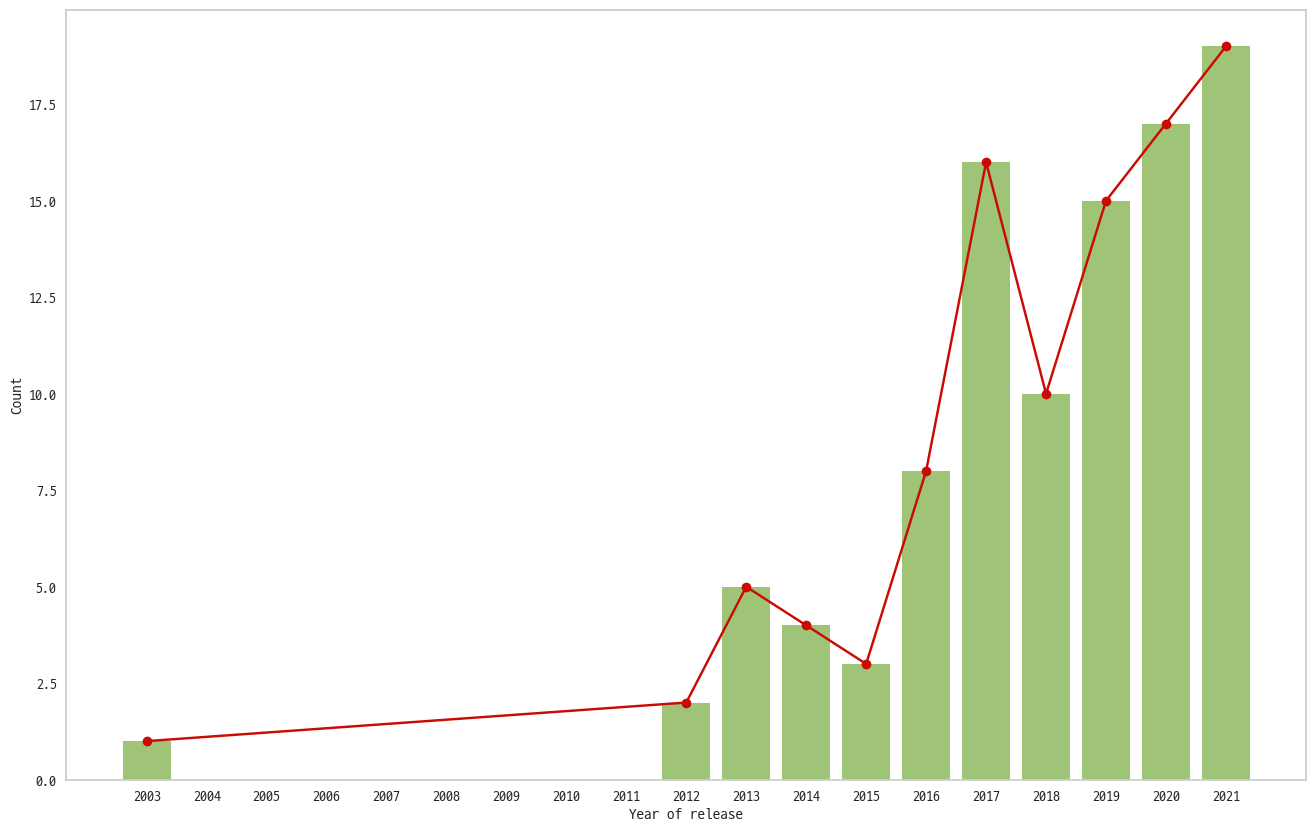

In [32]:
year_Count=newdrama.groupby('개봉년도')['이름'].count()

plt.figure(figsize=(16,10))
plt.plot(year_Count,color='r',marker='o')   # marker : ^, x
plt.bar(year_Count.index, year_Count, color='g')
plt.xticks(range(2003,2022,1))
plt.xlabel('Year of release')
plt.ylabel('Count')
plt.grid()
plt.show()

## 22. 개봉년도별 평점의 평균에 대한 시각화

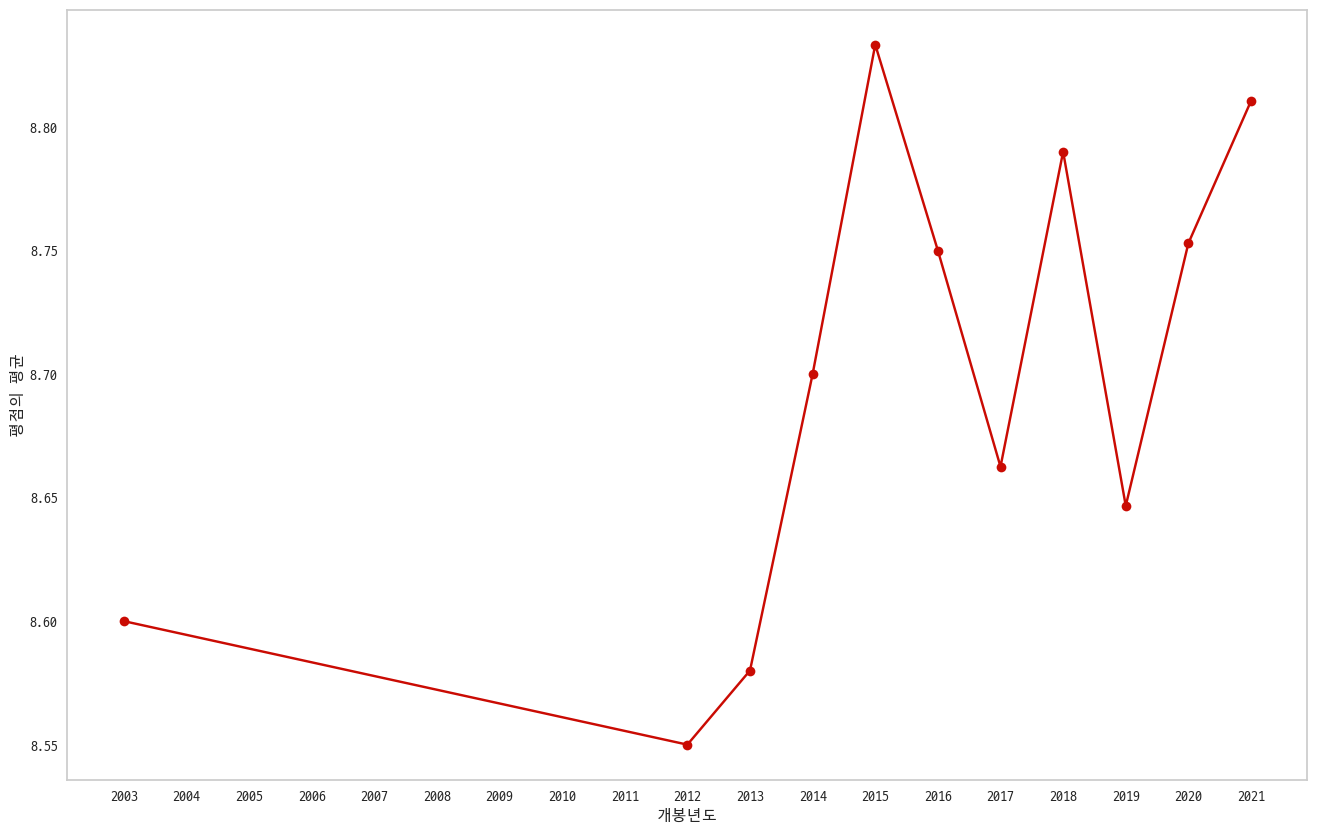

In [33]:
y = newdrama.groupby('개봉년도')['평점'].mean()

plt.figure(figsize=(16,10))
plt.plot(y,color='r',marker='o')
plt.xticks(range(2003,2022,1))
plt.xlabel('개봉년도')
plt.ylabel('평점의 평균')
plt.grid()
plt.show()

## 23. 등급별 드라마 개수

In [34]:
newdrama['등급'].value_counts()

등급
15+ - Teens 15 or older                   88
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    2
Name: count, dtype: int64

## 24. 년도별 각 등급의 개수

In [35]:
newdrama.groupby(['개봉년도', '등급'])[['이름']].count()

이름
개봉년도 등급                                        
2003 13+ - Teens 13 or older                  1
2012 15+ - Teens 15 or older                  2
2013 15+ - Teens 15 or older                  5
2014 15+ - Teens 15 or older                  3
     18+ Restricted (violence & profanity)    1
2015 15+ - Teens 15 or older                  3
2016 15+ - Teens 15 or older                  8
2017 15+ - Teens 15 or older                 16
2018 15+ - Teens 15 or older                  9
     18+ Restricted (violence & profanity)    1
2019 15+ - Teens 15 or older                 14
     18+ Restricted (violence & profanity)    1
2020 15+ - Teens 15 or older                 15
     18+ Restricted (violence & profanity)    2
2021 13+ - Teens 13 or older                  1
     15+ - Teens 15 or older                 13
     18+ Restricted (violence & profanity)    5

## 25. 개봉년도별 드라마 개수 1~5위까지 시각화

In [36]:
t=newdrama['개봉년도'].value_counts().head()    # 자동으로 내림차순이 된다
t

개봉년도
2021    19
2020    17
2017    16
2019    15
2018    10
Name: count, dtype: int64

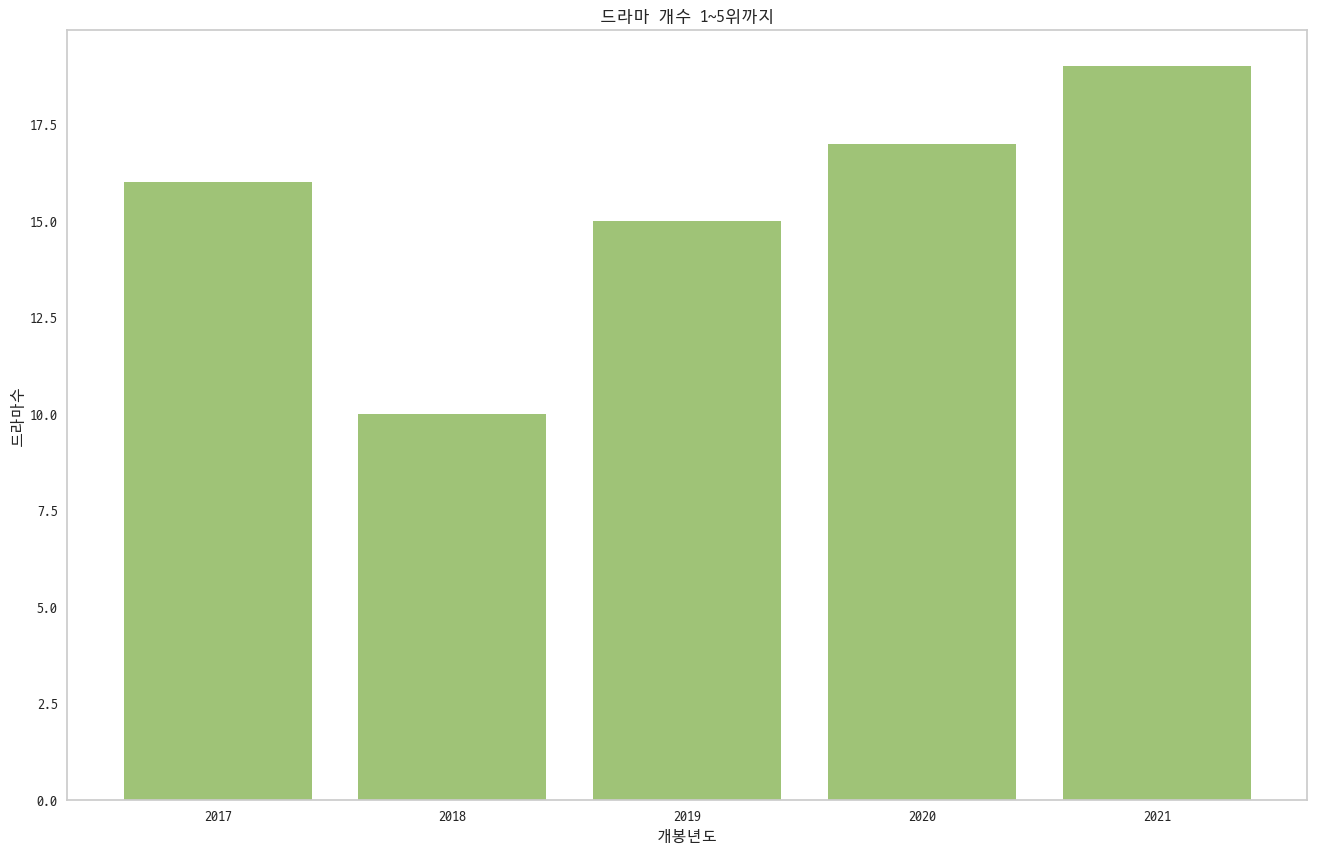

In [37]:
plt.figure(figsize=(16,10))
plt.bar(t.index, t, color='g')
plt.xlabel('개봉년도')
plt.ylabel('드라마수')
plt.title('드라마 개수 1~5위까지')
plt.grid()
plt.show()

## 26. 네트워크별 드라마 개수 상위 5개 시각화

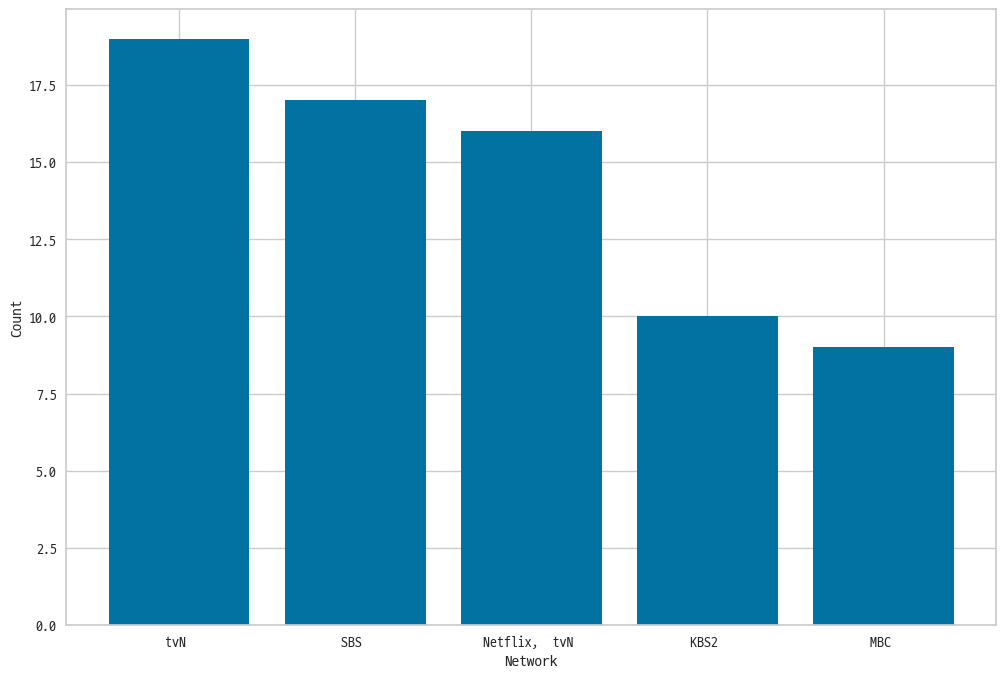

In [38]:
nw_top5=newdrama['네트워크'].value_counts().head()

plt.figure(figsize=(12,8))
plt.bar(nw_top5.index,nw_top5)
plt.xlabel('Network')
plt.ylabel('Count')
plt.show()

## 27. 네트워크별 드라마 비율

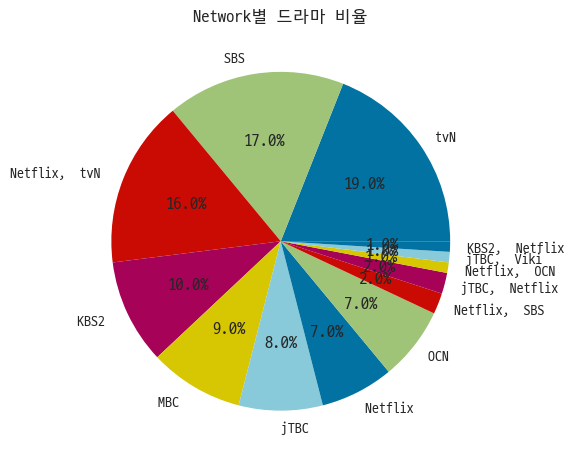

In [39]:
nw = newdrama['네트워크'].value_counts()
plt.pie(nw, labels=nw.index, autopct='%.1f%%')
plt.title('Network별 드라마 비율')
plt.show()

## 28. 방영요일 확인 및 시각화

In [40]:
d5 = newdrama['요일'].value_counts()
d5

요일
Monday, Tuesday        24
Wednesday, Thursday    23
Saturday, Sunday       21
Friday, Saturday       20
Friday                  7
Thursday                2
Sunday, Saturday        1
Saturday                1
Tuesday                 1
Name: count, dtype: int64

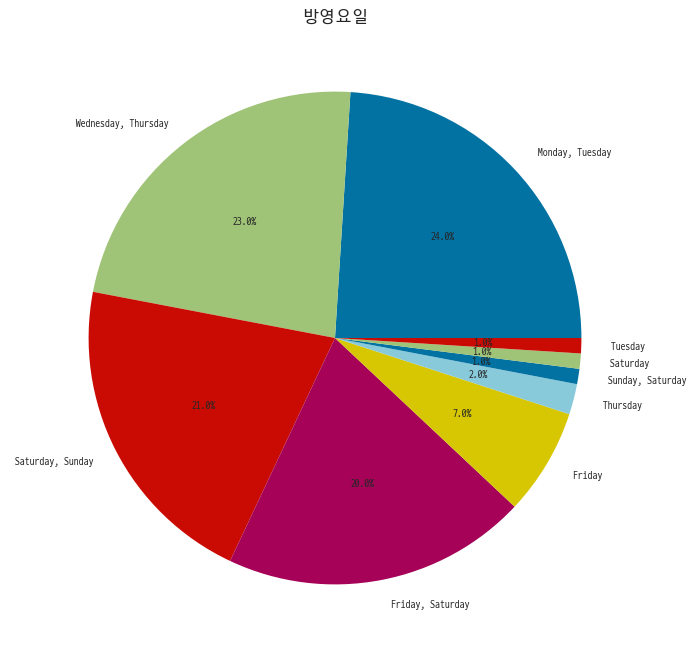

In [41]:
plt.figure(figsize=(8,8))
plt.pie(d5, labels=d5.index, autopct='%.1f%%', textprops={'fontsize':7})
plt.title('방영요일')
plt.show()

## 29. 방영요일 확인 및 시각화2 (최상위 5개 이외는 기타로 분류)

In [ ]:
# 상위 5개만 추출하고 컬럼명을 명확히

d6 = newdrama['요일'].value_counts().head(5).reset_index(name='count')
d6

,요일,count
0,"Monday, Tuesday",24
1,"Wednesday, Thursday",23
2,"Saturday, Sunday",21
3,"Friday, Saturday",20
4,Friday,7


In [69]:
# 상위 5개를 제외한 나머지를 분리하고 합계를 구함

others_sum = newdrama['요일'].value_counts().iloc[5:].sum()
others_sum

np.int64(5)

In [ ]:
# 상위 5개 바로 밑에 새롭게 행을 만들고 '요일'컬럼에 'Others', 'count'컬럼에 others_sum을 추가

d6.loc[len(d6)] = ['Others', others_sum]
d6

,요일,count
0,"Monday, Tuesday",24
1,"Wednesday, Thursday",23
2,"Saturday, Sunday",21
3,"Friday, Saturday",20
4,Friday,7
5,Others,5


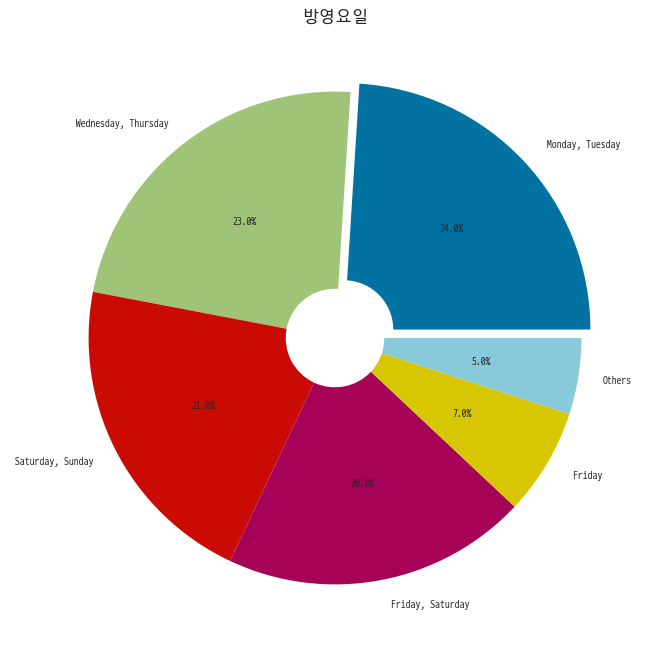

In [81]:
explode = [0.05, 0, 0, 0, 0, 0]

plt.figure(figsize=(8,8))
plt.pie(d6['count'], explode=explode, labels=d6['요일'], autopct='%.1f%%', textprops={'fontsize':7}, wedgeprops={'width': 0.8})
plt.title('방영요일')
plt.show()